<a href="https://colab.research.google.com/github/EloizioHMD/imersaodados3/blob/main/idd3_nb_d3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dia 3 da Imersão

início ao notebook carregando algumas informações já passadas. Como muito das coisas que estou fazendo nessa imersão são novas, ajuda a reforçar o aprendizado.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set()

In [ ]:
url_dados = 'https://github.com/EloizioHMD/imersaodados3/raw/main/dados/dados_experimentos.zip'
dados = pd.read_csv(url_dados, compression= "zip")

In [ ]:
mapa = {'droga' : 'composto'}
dados.rename(columns=mapa, inplace=True)
dados

,id,tratamento,tempo,dose,composto,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,id_fffb1ceed,com_droga,24,D2,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,0.7201,0.5773,0.3055,-0.4726,0.1269,0.2531,0.1730,-0.4532,-1.0790,0.2474,-0.4550,0.3588,0.1600,-0.7362,-0.1103,0.8550,-0.4139,0.5541,0.2310,-0.5573,-0.4

A aula buscou trabalhar a partir dos dados as correlações, relações e causalidades entre genes. Inicialmente, assim como nos dias anteriores, seguir fazendo algumas exploração dos dados para reverar mais insight.

## Tabela de frequência

In [ ]:
pd.crosstab(dados['dose'], dados['tempo']) ## Relacionando o count entre duas colunas

tempo,24,48,72
dose,,,
D1,3886,4354,3907
D2,3886,3896,3885


In [ ]:
## É possível fazer o mesmo para mais de uma coluna, bastando agregar duas delas em um único objeto com []
pd.crosstab([dados['dose'], dados['tempo']],dados['tratamento']) 

tratamento  com_controle  com_droga
dose tempo                         
D1   24              301       3585
     48              343       4011
     72              307       3600
D2   24              305       3581
     48              305       3591
     72              305       3580

In [ ]:
pd.crosstab([dados['dose'], dados['tempo']],dados['tratamento'], normalize=True) ## obter proporção global basta normalizar

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.012640   0.150542
     48         0.014403   0.168430
     72         0.012892   0.151172
D2   24         0.012808   0.150374
     48         0.012808   0.150794
     72         0.012808   0.150332

In [ ]:
pd.crosstab([dados['dose'], dados['tempo']],dados['tratamento'], normalize='index') ## é possível normalizarpor linha com index

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.077458   0.922542
     48         0.078778   0.921222
     72         0.078577   0.921423
D2   24         0.078487   0.921513
     48         0.078285   0.921715
     72         0.078507   0.921493

Como estamos trabalhando com tabelas, a biblioteca `NumPy` entrega algumas funcionalidades por meio dos agregadores.

In [ ]:
pd.crosstab([dados['dose'], dados['tempo']],  dados['tratamento'], values=dados['g-0'], aggfunc='mean')

tratamento  com_controle  com_droga
dose tempo                         
D1   24        -0.251760   0.367996
     48        -0.122773   0.412469
     72        -0.295271   0.286250
D2   24         0.010754   0.115253
     48         0.013174   0.214480
     72         0.070250   0.253439

## Scatterplot

Outra forma interessante de explorar correlação é através do gráfico [`scatterplot`](https://seaborn.pydata.org/generated/seaborn.scatterplot.html). Iremos usar esse recurso entre gene para entender a correlação entre eles.

In [ ]:
dados[['g-0', 'g-10']].head()

,g-0,g-10
0,1.0620,1.1830
1,0.0743,-1.1520
2,0.6280,-0.4797
3,-0.5138,-0.8269
4,-0.3254,-0.2219


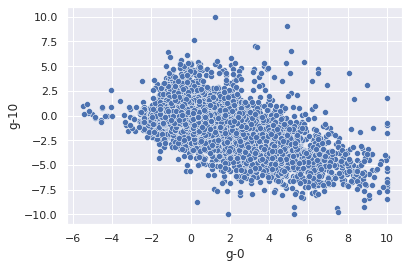

In [ ]:
sns.scatterplot(x='g-0', y='g-10', data=dados)

É possível usar o `hue=` para pegar uma variável de agrupamento produzindo pontos com cores diferentes para diferenciação. Pode ser categórico ou numérico, embora o mapeamento de cores se comporte de maneira diferente neste último caso.

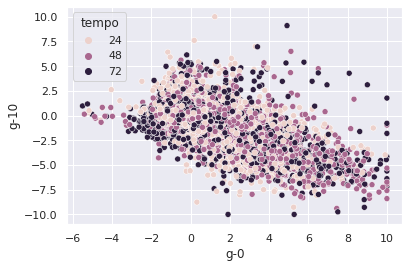

In [ ]:
sns.scatterplot(x='g-0', y='g-10', data=dados, hue='tempo')

Similar ao scatterplot o seaborn possuí o [lmplot](https://seaborn.pydata.org/generated/seaborn.lmplot.html), que além do gráfico de dispersão, vai desenhar uma linha de tendência e, assim, poderemos confirmar o padrão daquele conjunto de dados em análise.

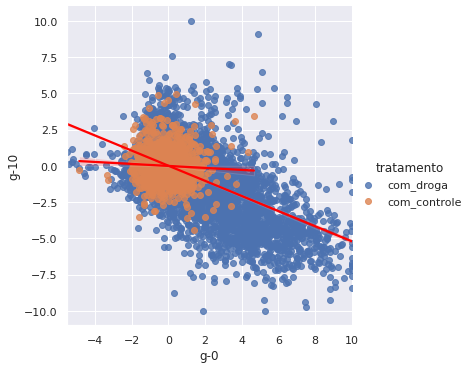

In [ ]:
sns.lmplot(data=dados, x='g-0', y='g-10', hue='tratamento', line_kws={'color': 'red'}) ## o line_kws serve para mudar a cor da linha.

Essa ferramenta é muito poderosa, é possível inclusive selecionar parâmetros para correlacionar os gráficos. Exemplo:

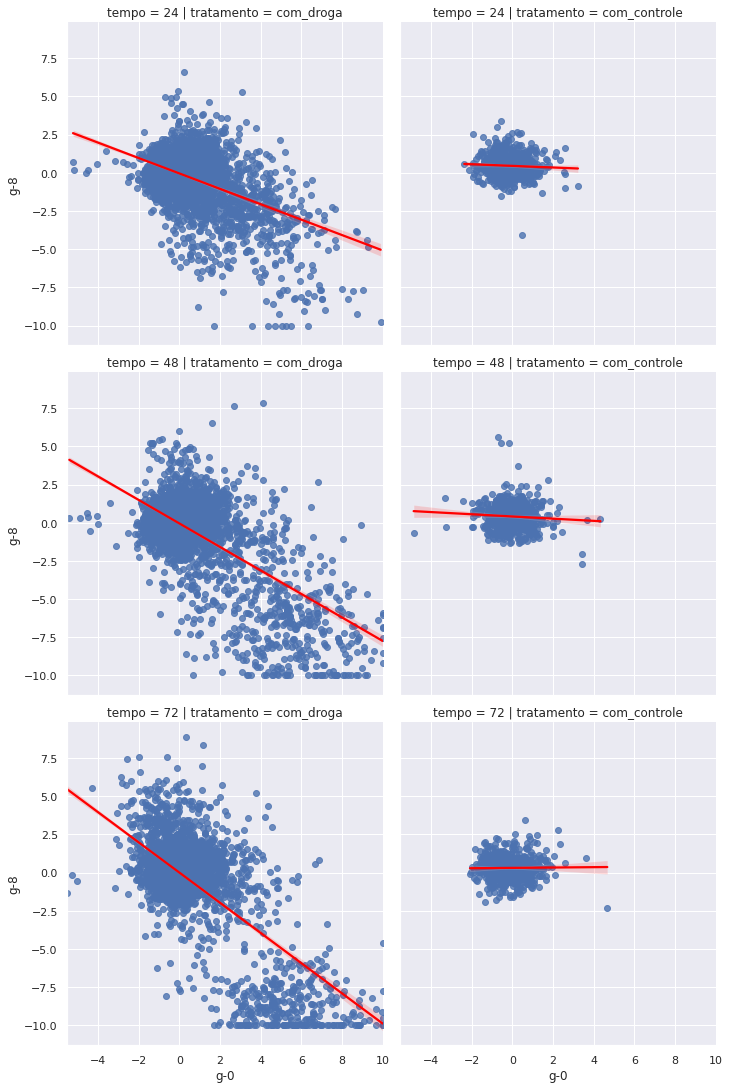

In [ ]:
sns.lmplot(data=dados, x='g-0', y='g-8', line_kws={'color': 'red'}, col='tratamento', row='tempo')

## Correlação e Heatmap

Uma das coisas mais interessantes no Python é a quantidade de códigos que podem ser aproveitas gerado pela comunidade. É o que iremos fazer no passo seguinte.

Iremos correlacionar alguns dados dos genes e posteriormente iremos produzir uma mapa de calor com essa correlação aproveitando um código fornecido na documentação do seaborn.

In [ ]:
dados.loc[:,'g-0':'g-771'].corr().head()

,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,g-35,g-36,g-37,g-38,g-39,...,g-732,g-733,g-734,g-735,g-736,g-737,g-738,g-739,g-740,g-741,g-742,g-743,g-744,g-745,g-746,g-747,g-748,g-749,g-750,g-751,g-752,g-753,g-754,g-755,g-756,g-757,g-758,g-759,g-760,g-761,g-762,g-763,g-764,g-765,g-766,g-767,g-768,g-769,g-770,g-771
g-0,1.000000,0.086032,0.176188,0.011266,0.403153,-0.165478,0.238348,-0.374451,-0.604212,-0.428779,-0.547606,0.219762,-0.199453,0.472223,-0.346179,-0.201323,-0.513026,-0.433536,-0.002073,-0.074622,-0.468599,0.052445,0.022269,-0.076298,-0.337522,-0.235191,-0.422814,0.148432,-0.471092,-0.296871,-0.528327,0.558136,-0.133229,-0.155987,-0.120247,0.327593,-0.147800,-0.591868,0.602623,0.450769,...,0.365095,-0.528006,0.295970,0.067108,-0.250243,-0.110665,-0.214344,-0.280492,-0.036098,-0.128288,-0.498922,-0.469595,0.673664,0.538050,0.297528,0.066530,0.240252,-0.170949,0.485924,-0.093815,0.397476,0.017923,0.321260,-0.131709,-0.133430,0.178220,0.201902,-0.205648,-0.676835,-0.433554,0.005085,-0.239410,0.548401,0.425222,-0.308095,-0.052622,0.300241,-0.127375,-0.514201,0.405908
g-1,0.086032,1.000000,-0.054518,-0.027855,0.193647,-0.151590,-0.122541,0.144537,-0.009973,-0.047558,-0.009051,0.161274,0.037178,-0.009256,0.002632,-0.070193,-0.063414,-0.000944,-0.023748,-0.034714,-0.131031,0.196596,-0.061441,0.090620,-0.004299,-0.032600,-0.019435,0.015661,-0.098907,-0.091071,-0.053331,-0.049514,0.187382,-0.091232,0.045417,0.044373,-0.077671,-0.005265,-0.042213,0.050546,...,-0.015556,-0.017184,0.043104,-0.189662,-0.050194,-0.007878,-0.083539,-0.042175,0.014307,-0.134166,-0.026985,0.088382,-0.077453,0.015545,-0.027527,-0.071078,-0.095445,0.049612,-0.040518,-0.074277,-0.022356,0.125763,-0.082779,0.020292,-0.023171,-0.207192,-0.066570,-0.057007,0.002062,0.029795,-0.205998,0.060051,0.115071,0.160140,0.015098,-0.003378,-0.030756,-0.006866,-0.095108,-0.032233
g-2,0.176188,-0.054518,1.000000,0.042633,0.013968,0.018516,0.015190,-0.144205,-0.128029,-0.081332,-0.105050,0.011198,-0.063501,0.082011,-0.082204,-0.059607,-0.137811,-0.085491,0.053335,0.028813,-0.061160,-0.129131,-0.007426,-0.034230,-0.128312,-0.067363,-0.126554,0.036984,-0.129481,-0.017941,-0.152288,0.172191,-0.100086,-0.033010,-0.015481,0.001098,-0.020374,-0.157977,0.169464,0.144449,...,0.089525,-0.140916,0.008587,0.042106,-0.018846,-0.008093,-0.074404,-0.080120,-0.020085,-0.028099,-0.098775,-0.113000,0.175916,0.119166,0.071051,0.025358,0.078971,-0.086326,0.149456,0.033432,0.124239,-0.006327,0.120148,-0.041162,-0.030040,0.048549,0.096369,0.000494,-0.172627,-0.130200,0.090115,-0.055655,0.138085,0.061574,-0.093631,-0.053149,0.115415,0.014489,-0.078661,0.103985
g-3,0.011266,-0.027855,0.042633,1.000000,-0.033039,0.042231,-0.043177,-0.175692,-0.086167,-0.014052,-0.074101,0.181024,0.030539,0.192727,0.128792,-0.045688,0.033974,-0.070920,0.237669,0.112392,0.027867,-0.167263,0.197013,-0.049480,-0.113336,0.175615,0.111355,0.007168,-0.022381,-0.128269,-0.042827,0.098416,-0.091962,-0.083806,0.184985,-0.070933,-0.317859,-0.228039,0.084346,0.054827,...,0.039519,0.000851,0.011655,-0.116724,0.304819,-0.087159,-0.134135,-0.031211,0.174116,0.060289,-0.119276,-0.140391,0.110547,0.145925,0.155011,0.049182,-0.007754,-0.128488,0.078139,0.012422,0.040728,0.164467,0.171886,-0.069777,0.066560,0.102111,-0.036922,0.111994,-0.133740,-0.226928,0.075982,0.178422,0.016467,-0.089317,-0.166426,-0.179370,0.028452,-0.206077,-0.002142,0.058219
g-4,0.403153,0.193647,0.013968,-0.033039,1.000000,-0.057449,0.206405,-0.032748,-0.474828,-0.274167,-0.458021,0.116467,-0.207078,0.210440,-0.307280,0.019531,-0.275700,-0.422889,-0.012207,-0.088152,-0.311798,0.286106,-0.055368,-0.113396,-0.120743,-0.233682,-0.340708,0.070292,-0.360274,-0.225461,-0.402256,0.324362,0.091731,-0.052787,-0.073490,0.195062,-0.124394,-0.277002,0.285256,0.300517,...,0.215930,-0.292602,-0.008241,-0.005070,-0.284391,-0.116918,-0.252399,-0.250280,0

In [ ]:
corr = dados.loc[:,'g-0':'g-50'].corr() ## Atribuir um recorte do dado correlacioando à um objeto. 

Buscar na comunidade o [Plotting a diagonal correlation matrix](https://seaborn.pydata.org/examples/many_pairwise_correlations.html). *Mutatis mutandis* temos o seguinte:

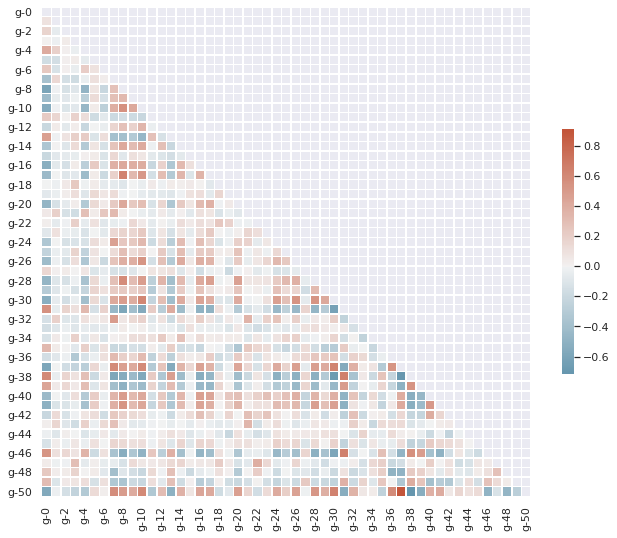

In [ ]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Esse gráfico demonstra por meio do recurso das cores o grau de correlação. Quanto mais próximo de 1 ou -1 maior a correlação, que será respectivamente positiva e negativa (em tons de laranja mais escuro e azul mais escuro). Uma correlação próxima de 0 existe pouca correlação, por isso o tom mais ameno das cores.

In [ ]:
corr_celular = dados.loc[:,'c-0':'c-50'].corr() ## Corelacionando os dados de viabilidade celular (C).

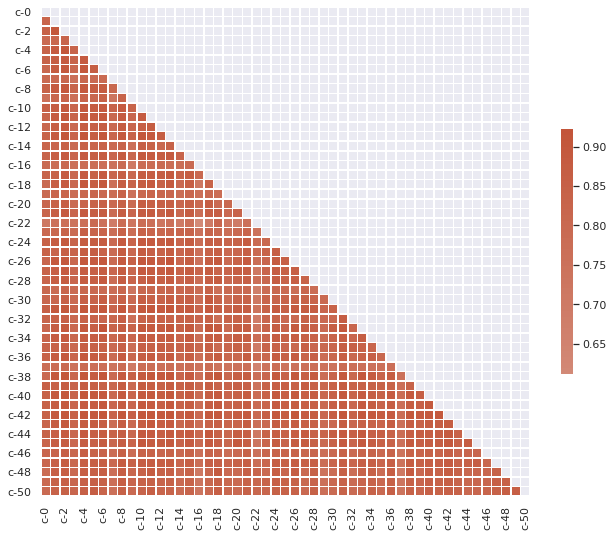

In [ ]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_celular, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_celular, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Fica claro a correlação positiva entre as amostras de viabilidade celular.

### Desafio 01
Criar tabela e frequência com o `pandas.groupby()`.

In [ ]:
dados.groupby(by=['dose', 'tempo', 'tratamento']).nunique()[['composto']]

composto
dose tempo tratamento            
D1   24    com_controle         1
           com_droga         3141
     48    com_controle         1
           com_droga         3281
     72    com_controle         1
           com_droga         3147
D2   24    com_controle         1
           com_droga         3145
     48    com_controle         1
           com_droga         3140
     72    com_controle         1
           com_droga         3135

In [ ]:
dados.groupby(by=['dose', 'tempo', 'tratamento']).count()[['composto']]

composto
dose tempo tratamento            
D1   24    com_controle       301
           com_droga         3585
     48    com_controle       343
           com_droga         4011
     72    com_controle       307
           com_droga         3600
D2   24    com_controle       305
           com_droga         3581
     48    com_controle       305
           com_droga         3591
     72    com_controle       305
           com_droga         3580

### Desafio 02
Normalizar os dados pela coluna.

In [ ]:
pd.crosstab([dados['dose'], dados['tempo']],dados['tratamento'], normalize='columns')

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.161308   0.163341
     48         0.183816   0.182750
     72         0.164523   0.164024
D2   24         0.163451   0.163158
     48         0.163451   0.163614
     72         0.163451   0.163113

### Desafio 03
Explorar outros agregadores (Quais são os agregadores?).

O Numpy possui agregação e estatísticas incorporadas rápidas para trabalhar em matrizes. Os agregadores são:
* np.sum() : usado para descobrir a soma da matriz fornecida.
* np.prod() : Usado para descobrir o produto (multiplicação) dos valores.
* np.mean() : Retorna a média do array de entrada.
* np.std() : Retorna o desvio padrão da matriz de entrada m fornecida.
* np.var() : Usado para descobrir a variação dos dados fornecidos na forma de array.
* np.min() : Retorna o valor mínimo entre os elementos do array m dado.
* np.max() : Retorna o valor máximo entre os elementos do array m dado.
* np.argmin() : retorna o índice do valor mínimo entre os elementos do array.
* np.argmax() : retorna o índice do valor máximo entre os elementos do array.
* np.median() : retorna a mediana dos elementos do array.

In [ ]:
## Loop para gerar crosstab dos agregadores e comparar.

mask=['sum', 'prod', 'mean', 'std', 'var', 'min', 'max', 'median']
for func in mask:
  print('\n', func)
  print(pd.crosstab(index  = [dados.dose, dados.tempo], 
                    columns= dados.tratamento, 
                    values = dados['g-0'], aggfunc=func))


 sum
tratamento  com_controle  com_droga
dose tempo                         
D1   24         -75.7799  1319.2648
     48         -42.1113  1654.4150
     72         -90.6483  1030.5010
D2   24           3.2800   412.7202
     48           4.0180   770.1980
     72          21.4262   907.3112

 prod
tratamento   com_controle  com_droga
dose tempo                          
D1   24     9.143747e-120       -0.0
     48    -8.360749e-127        0.0
     72     -2.183271e-97       -0.0
D2   24     3.016311e-116        0.0
     48     2.756767e-138        0.0
     72     -0.000000e+00        0.0

 mean
tratamento  com_controle  com_droga
dose tempo                         
D1   24        -0.251760   0.367996
     48        -0.122773   0.412469
     72        -0.295271   0.286250
D2   24         0.010754   0.115253
     48         0.013174   0.214480
     72         0.070250   0.253439

 std
tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.751395   1.4

Peguei a resposta dessa exploração em loop do notebook [LucasDatilioCarderelli](https://github.com/LucasDatilioCarderelli/ImersaoDados3/blob/main/Aula_03.ipynb) 

### Desafio 04
Explorar o melt.

O pd.melt() "derrete" as colunas "value_vars. Esta função é útil para massagear um DataFrame em um formato onde uma ou mais colunas são variáveis identificadoras (id_vars), enquanto todas as outras colunas, consideradas variáveis medidas (value_vars), são "não dinamizadas" para o eixo da linha, deixando apenas dois não identificadores colunas, 'variável' e 'valor'.

In [ ]:
columns=dados.loc[:, 'g-0': 'g-10'].columns
pd.melt(dados, id_vars=['dose', 'tempo', 'tratamento'], value_vars=columns)

,dose,tempo,tratamento,variable,value
0,D1,24,com_droga,g-0,1.0620
1,D1,72,com_droga,g-0,0.0743
2,D1,48,com_droga,g-0,0.6280
3,D1,48,com_droga,g-0,-0.5138
4,D2,72,com_droga,g-0,-0.3254
...,...,...,...,...,...
261949,D2,24,com_droga,g-10,0.2531
261950,D2,24,com_droga,g-10,-0.1851
261951,D2,48,com_controle,g-10,-0.1854
261952,D1,24,com_droga,g-10,0.5742


In [ ]:
pd.melt(dados, id_vars='g-0', value_vars='composto').sort_values(by='g-0')

,g-0,variable,value
726,-5.513,composto,d1d4140f4
7834,-5.420,composto,82a5720b8
1128,-5.261,composto,2002e6125
5117,-5.233,composto,b4c9484ae
19974,-5.183,composto,53d56037b
...,...,...,...
18144,10.000,composto,87d714366
19405,10.000,composto,87d714366
119,10.000,composto,87d714366
4051,10.000,composto,87d714366



### Desafio 05
Correlacionar as células com os genes. Refletir sobre os efeitos biológicos.

In [ ]:
## Correlação de dados do g0 ao g99 com o conjunto de c
gc_corr = dados.loc[:, 'g-0':'g-99'].merge(dados.loc[:, 'c-0':'c-99'], on=dados['id']).corr()
gc_corr = gc_corr.iloc[:100, 100:] ## seleção por posição para correlacionar o g ao c
gc_corr

,c-0,c-1,c-2,c-3,c-4,c-5,c-6,c-7,c-8,c-9,c-10,c-11,c-12,c-13,c-14,c-15,c-16,c-17,c-18,c-19,c-20,c-21,c-22,c-23,c-24,c-25,c-26,c-27,c-28,c-29,c-30,c-31,c-32,c-33,c-34,c-35,c-36,c-37,c-38,c-39,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
g-0,-0.624116,-0.624810,-0.639789,-0.604041,-0.606231,-0.629189,-0.669697,-0.608954,-0.642211,-0.630989,-0.626020,-0.631486,-0.629841,-0.643529,-0.622502,-0.647751,-0.638829,-0.678957,-0.594877,-0.643239,-0.684132,-0.630950,-0.543857,-0.579103,-0.660192,-0.605740,-0.620731,-0.661781,-0.647510,-0.615229,-0.653816,-0.659935,-0.646008,-0.656088,-0.649368,-0.639943,-0.606850,-0.565831,-0.627974,-0.645185,...,-0.662186,-0.639153,-0.665249,-0.604982,-0.621192,-0.646914,-0.630096,-0.625521,-0.643556,-0.622139,-0.655613,-0.637361,-0.669361,-0.666255,-0.541994,-0.660842,-0.540702,-0.647280,-0.670072,-0.592806,-0.644508,-0.577032,-0.621314,-0.673295,-0.588529,-0.660818,-0.625025,-0.625130,-0.627185,-0.682893,-0.648726,-0.629025,-0.633479,-0.668520,-0.656116,-0.600758,-0.646784,-0.622840,-0.640484,-0.609238
g-1,-0.037405,-0.030558,-0.039616,0.011899,-0.027014,-0.004664,-0.027941,-0.003155,-0.016199,0.012004,-0.011896,-0.028692,-0.016804,-0.039030,-0.018724,0.001283,-0.020506,-0.028191,-0.006079,-0.004661,-0.009059,-0.013806,0.052851,0.019902,-0.015551,0.020494,-0.021502,-0.023190,-0.026067,-0.016824,-0.008202,-0.035886,-0.020831,-0.016770,0.006563,-0.005731,-0.032461,-0.037041,-0.027810,0.001859,...,-0.040883,-0.027389,-0.013518,-0.005513,0.004970,0.000605,0.005983,-0.025452,-0.014658,-0.016301,-0.035473,0.004021,-0.041172,-0.023066,0.004179,-0.020136,0.023721,-0.003363,-0.044079,0.006385,-0.004805,-0.010185,0.002633,-0.022321,-0.018388,-0.020843,-0.016555,0.011173,-0.037424,-0.008322,-0.034557,-0.000934,-0.022478,-0.034891,-0.042638,-0.011237,-0.022127,-0.008487,-0.002824,-0.002308
g-2,-0.168656,-0.178692,-0.176733,-0.156894,-0.180127,-0.170701,-0.181008,-0.175473,-0.178634,-0.163261,-0.180958,-0.176356,-0.180042,-0.183370,-0.174772,-0.180545,-0.162327,-0.177785,-0.169176,-0.170238,-0.182883,-0.172854,-0.137744,-0.193688,-0.170649,-0.171545,-0.179031,-0.184632,-0.162529,-0.166055,-0.177225,-0.185423,-0.184273,-0.187304,-0.173426,-0.187504,-0.160625,-0.160252,-0.181268,-0.183121,...,-0.179885,-0.183319,-0.185323,-0.174439,-0.163617,-0.174381,-0.185913,-0.166461,-0.181092,-0.167242,-0.180925,-0.178400,-0.175939,-0.182079,-0.151960,-0.183145,-0.181286,-0.159720,-0.179919,-0.162542,-0.183613,-0.170641,-0.186154,-0.177631,-0.166103,-0.187158,-0.157164,-0.170382,-0.164975,-0.174041,-0.183325,-0.186048,-0.166786,-0.190383,-0.178312,-0.158105,-0.182540,-0.178812,-0.170152,-0.172124
g-3,-0.037342,-0.093505,-0.085298,-0.029079,-0.065964,-0.054947,-0.118651,-0.031232,-0.060544,-0.098435,-0.056865,-0.072926,-0.081498,-0.078792,-0.072001,-0.041614,-0.057309,-0.085462,-0.064829,-0.025428,-0.069663,-0.070663,0.070106,-0.001622,-0.060156,-0.007329,-0.108669,-0.068180,-0.084874,-0.038126,-0.057558,-0.096243,-0.040765,-0.091024,-0.042440,-0.048595,-0.077177,-0.033611,-0.101452,-0.028037,...,-0.115228,-0.037189,-0.077496,-0.060176,-0.026180,-0.099132,-0.026693,-0.060265,-0.036769,-0.045193,-0.140946,-0.026295,-0.076285,-0.055792,-0.035812,-0.078715,-0.050296,-0.071568,-0.078478,-0.046407,-0.033641,-0.064704,-0.044155,-0.083462,-0.028035,-0.063797,-0.039701,0.010285,-0.047301,-0.066781,-0.091892,-0.045385,-0.089801,-0.089818,-0.081073,-0.016778,-0.083846,-0.049951,-0.079855,-0.037579
g-4,-0.403545,-0.379840,-0.392841,-0.357850,-0.365118,-0.384914,-0.364633,-0.378776,-0.383263,-0.346834,-0.379019,-0.384599,-0.379915,-0.389980,-0.395484,-0.382739,-0.387586,-0.390418,-0.342299,-0.394375,-0.404137,-0.378579,-0.319028,-0.351363,-0.393502,-0.372542,-0.357408,-0.406761,-0.382014,-0.381405,-0.376348,-0.390938,-0.415720,-0.369416,-0.393812,-0.380305,-0.385241,-0.360443,-0.36505

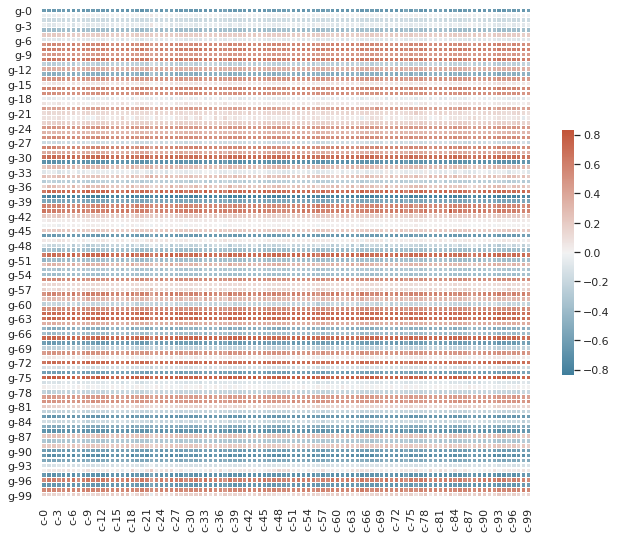

In [ ]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(gc_corr, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

Esse gráfico mostra apenas coencidências de correlação entre alguns genes com a mostras celulares. Ou seja, as células alí contidas possuêm alguma relação com o gene combinado, ou não.

### Desafio 06
Estudar o código que plota a matrix de correlaçao (heatmap).

Primeira coisa que a documentação informa é que o seaborn faz uso desses recursos `set_theme()`, `diverging_palette()`, `heatmap()` para gerar a matrix de correlação diagonal.

[`set_theme()`](https://seaborn.pydata.org/generated/seaborn.set_theme.html#seaborn.set_theme)

Esse recurso permite definir vários parâmetros de tema. Cada conjunto de parâmetros pode ser definido direta ou temporariamente. Consulte as funções referenciadas na documentação para obter mais informações.

[`diverging_palette()`](https://seaborn.pydata.org/generated/seaborn.diverging_palette.html#seaborn.diverging_palette)

Faça uma paleta divergente entre duas cores HUSL. Se você estiver usando o  IPython Notebook, também pode escolher esta paleta interativamente com a função choose_diverging_palette ().

[`heatmap()`](https://seaborn.pydata.org/generated/seaborn.heatmap.html#seaborn.heatmap)

Plote dados retangulares como uma matriz codificada por cores. Esta é uma função no nível dos eixos e desenhará o mapa de calor para os eixos ativos no momento, se nenhum for fornecido para o argumento do `ax`. Parte deste espaço dos eixos será tomado e usado para traçar um mapa de cores, a menos que cbar seja `False` ou um eixo separado seja fornecido para `cbar_ax`.

Vamos ao código:

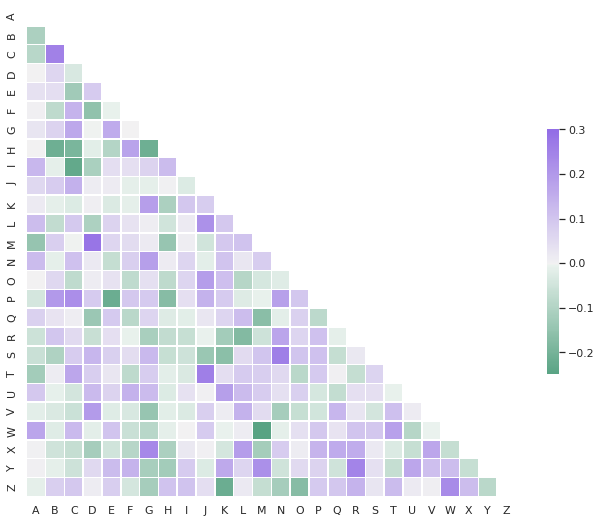

In [55]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

# Gerador randomico de dataset
rs = np.random.RandomState(33)
d = pd.DataFrame(data=rs.normal(size=(100, 26)),
                 columns=list(ascii_letters[26:]))

# Computando a matrix de correlação do dataset d
corr = d.corr()

# Gerar uma máscara para o triângulo superior
mask = np.triu(np.ones_like(corr, dtype=bool))

# Configure a dimensão da figura no matplotlib
f, ax = plt.subplots(figsize=(11, 9))

# Gerar um mapa de cores divergentes personalizado
cmap = sns.diverging_palette(150, 275, s=80, l=55, n=9, as_cmap=True)

# Desenhe o mapa de calor com a máscara e a proporção correta (aspect ratio)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Desafio 07
Resumo do aprendizado com os dados.

O principal aprendizado foi sobre como formular correlações usando os recursos do Python através das suas bibliotecas/pacotes.

Por meio da exploração das correlações alguns insight sobre drug investigation foram possíveis, como por exemplo a matrix que correlacionou genes com conjunto celulares. Esse mesmo insight restou claro que a investigação será repetitiva e deve ser de um para muito.

Nesse sentido, ainda não li nenhuma documentação de como é feita a investigação, mas tenho a percepção que está estudando os efeitos de várias drogas sob um conjunto celular representativo, ao passo que faz uma relação de  causa e efeitos da amostras celular com a resposta no gene.